In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras._tf_keras.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
import os
print(f"Kích thước model: {os.path.getsize('C://Users//84946//OneDrive//Desktop//Documents PTIT//HK2_nam4//Lap_trinh_nhung//project//Model//nhung_model.tflite') / 1024} KB")

Kích thước model: 63.609375 KB


In [3]:
#setting
tflite_model_name = 'nhung_model'  # Will be given .tflite suffix
c_model_name = 'nhung_model'

In [6]:
# Load the data
data = pd.read_csv('C://Users//84946//OneDrive//Desktop//Documents PTIT//HK2_nam4//Lap_trinh_nhung//project//Data//data.csv')

In [9]:
# Calculate the mean of each column
mean_temperature = data['Temperature'].mean()
mean_humidity = data['Humidity'].mean()
mean_soil_moisture = data['SoilMoisture'].mean()

# Display the mean values
print("Mean of data.csv:")
print(f"Temperature: {mean_temperature:.2f}")
print(f"Humidity: {mean_humidity:.2f}")
print(f"SoilMoisture: {mean_soil_moisture:.2f}")

std_temperature = data['Temperature'].std()
std_humidity = data['Humidity'].std()
std_soil_moisture = data['SoilMoisture'].std()

print("Standard Deviation of data.csv:")
print(f"Temperature: {std_temperature:.2f}")
print(f"Humidity: {std_humidity:.2f}")
print(f"SoilMoisture: {std_soil_moisture:.2f}")

Mean of data.csv:
Temperature: 30.34
Humidity: 61.99
SoilMoisture: 2712.95
Standard Deviation of data.csv:
Temperature: 0.58
Humidity: 5.24
SoilMoisture: 179.15


In [32]:
# Convert the 'Time' column to datetime
data['Time'] = pd.to_datetime(data['Time'])

# Sort data by time to ensure proper sequencing
data = data.sort_values(by='Time')

# Ensure all data is numeric and handle missing values
data = data.apply(pd.to_numeric, errors='coerce')
data = data.dropna()

# Normalize the data
scaler = StandardScaler()
data[['Temperature', 'Humidity', 'SoilMoisture']] = scaler.fit_transform(data[['Temperature', 'Humidity', 'SoilMoisture']])


In [33]:
# Function to create time series sequences
def create_sequences(data, time_steps=3):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data.iloc[i:i + time_steps][['Temperature', 'Humidity', 'SoilMoisture']].values)
        y.append(data.iloc[i + time_steps][['Temperature', 'Humidity', 'SoilMoisture']].values)
    return np.array(X), np.array(y)

In [ ]:
# Create sequences
time_steps = 3  # Number of time steps
X, y = create_sequences(data, time_steps)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Conv1D model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(time_steps, 3)),  # Input shape: (time_steps, features)
    tf.keras.layers.Conv1D(32, kernel_size=3, activation='relu'),
    tf.keras.layers.Dropout(0.2),  # Thêm Drop-out sau Conv1D
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),  # Thêm Dropout sau Dense
    tf.keras.layers.Dense(3)  # Output layer: Predict Temperature, Humidity, SoilMoisture
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])



In [35]:
# Train the model and store the training history
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.7832 - mae: 0.7044 - val_loss: 0.4589 - val_mae: 0.5390
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5189 - mae: 0.5615 - val_loss: 0.3016 - val_mae: 0.4210
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3971 - mae: 0.4780 - val_loss: 0.2005 - val_mae: 0.3550
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3330 - mae: 0.4307 - val_loss: 0.1224 - val_mae: 0.2931
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2355 - mae: 0.3569 - val_loss: 0.0745 - val_mae: 0.2330
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2569 - mae: 0.3418 - val_loss: 0.0527 - val_mae: 0.1935
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1946 - mae: 0.3092 - val_loss: 0.0396 - val_mae: 0.1666
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1300 - mae: 0.2665 - val_loss: 0.0380 - val_mae: 0.1617
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1305 - mae: 0.2664 

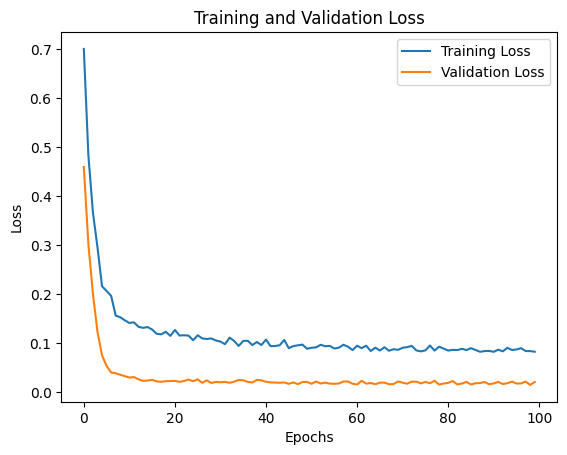

In [36]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

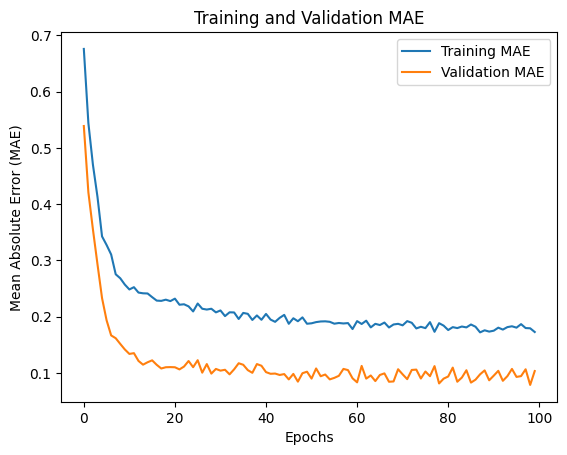

In [37]:
# Plot training and validation MAE
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()
plt.title('Training and Validation MAE')
plt.show()

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Actual vs Predicted Values:
Time Step 1:
  Actual    -> Temperature: -0.25, Humidity: 0.96, SoilMoisture: -0.23
  Predicted -> Temperature: 29.98, Humidity: 67.68, SoilMoisture: 2648.83
--------------------------------------------------
Time Step 2:
  Actual    -> Temperature: -0.25, Humidity: 0.96, SoilMoisture: -0.23
  Predicted -> Temperature: 29.98, Humidity: 67.51, SoilMoisture: 2654.88
--------------------------------------------------
Time Step 3:
  Actual    -> Temperature: -0.25, Humidity: 0.96, SoilMoisture: -0.23
  Predicted -> Temperature: 29.98, Humidity: 67.51, SoilMoisture: 2654.88
--------------------------------------------------
Time Step 4:
  Actual    -> Temperature: 0.78, Humidity: 6.88, SoilMoisture: -0.48
  Predicted -> Temperature: 29.98, Humidity: 67.51, SoilMoisture: 2654.88
--------------------------------------------------
Time Step 5:
  Actual    -> Temperature: -0.25, Humidity: 0.96, SoilMoisture: -0.35
  Predicted ->

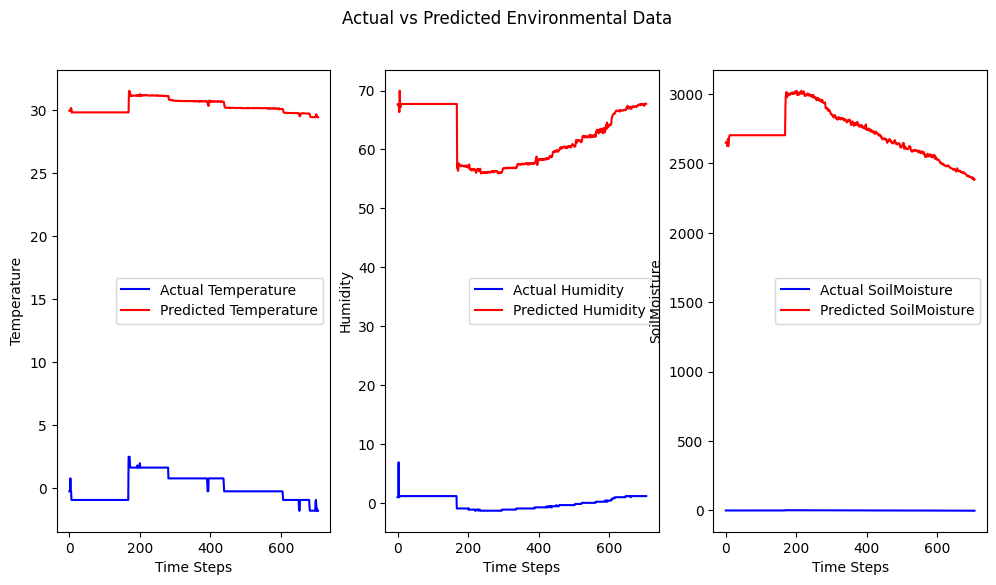

In [38]:
# Make predictions
predictions = model.predict(X)

# Inverse transform the predictions to get the original scale
predictions_original_scale = scaler.inverse_transform(predictions)

# Extract actual values for comparison
actual_values = data[['Temperature', 'Humidity', 'SoilMoisture']].iloc[time_steps:].values

# Display actual and predicted values
print("Actual vs Predicted Values:")
for i in range(len(predictions_original_scale)):
    print(f"Time Step {i + 1}:")
    print(f"  Actual    -> Temperature: {actual_values[i][0]:.2f}, Humidity: {actual_values[i][1]:.2f}, SoilMoisture: {actual_values[i][2]:.2f}")
    print(f"  Predicted -> Temperature: {predictions_original_scale[i][0]:.2f}, Humidity: {predictions_original_scale[i][1]:.2f}, SoilMoisture: {predictions_original_scale[i][2]:.2f}")
    print("-" * 50)

# Plot predictions vs actual values
plt.figure(figsize=(12, 6))

# Plot Temperature
plt.subplot(1, 3, 1)
plt.plot(actual_values[:, 0], label='Actual Temperature', color='blue')
plt.plot(predictions_original_scale[:, 0], label='Predicted Temperature', color='red')
plt.xlabel('Time Steps')
plt.ylabel('Temperature')
plt.legend()

# Plot Humidity
plt.subplot(1, 3, 2)
plt.plot(actual_values[:, 1], label='Actual Humidity', color='blue')
plt.plot(predictions_original_scale[:, 1], label='Predicted Humidity', color='red')
plt.xlabel('Time Steps')
plt.ylabel('Humidity')
plt.legend()

# Plot SoilMoisture
plt.subplot(1, 3, 3)
plt.plot(actual_values[:, 2], label='Actual SoilMoisture', color='blue')
plt.plot(predictions_original_scale[:, 2], label='Predicted SoilMoisture', color='red')
plt.xlabel('Time Steps')
plt.ylabel('SoilMoisture')
plt.legend()

plt.suptitle('Actual vs Predicted Environmental Data')
plt.show()

In [39]:
# Define the representative dataset generator for quantization
def representative_data_gen():
    for i in range(100):
        yield [X_train[i:i+1].astype(np.float32)]  # Use training data as representative data

# Convert the model to TensorFlow Lite with INT8 quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_data_gen
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.int8
converter.inference_output_type = tf.int8

# Convert the model
tflite_model = converter.convert()

# Save the quantized model
with open("model_quantized_int8.tflite", "wb") as f:
    f.write(tflite_model)

print("Model successfully converted to INT8!")

INFO:tensorflow:Assets written to: C:\Users\84946\AppData\Local\Temp\tmpbfzy7gg4\assets


INFO:tensorflow:Assets written to: C:\Users\84946\AppData\Local\Temp\tmpbfzy7gg4\assets


Saved artifact at 'C:\Users\84946\AppData\Local\Temp\tmpbfzy7gg4'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 3, 3), dtype=tf.float32, name='keras_tensor_21')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  1581278280400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1581278281360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1581278280784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1581278280976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1581278281552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1581176309328: TensorSpec(shape=(), dtype=tf.resource, name=None)


c:\Users\84946\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\lite\python\convert.py:997: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(


Model successfully converted to INT8!


In [40]:
# Function: Convert some hex value into an array for C programming (ESP32-compatible)
def hex_to_c_array(hex_data, var_name):
    c_str = ''

    # Create header guard
    c_str += '#ifndef ' + var_name.upper() + '_H\n'
    c_str += '#define ' + var_name.upper() + '_H\n\n'
    c_str += '#include <pgmspace.h>\n\n'  # Bắt buộc để dùng PROGMEM trên ESP32

    # Add array length
    c_str += 'const unsigned int ' + var_name + '_len = ' + str(len(hex_data)) + ';\n'

    # Declare C variable (with PROGMEM)
    c_str += 'const unsigned char ' + var_name + '[] PROGMEM = {\n '

    # Convert hex data to string
    hex_array = []
    for i, val in enumerate(hex_data):
        hex_str = format(val, '#04x')  # Convert to hex
        if (i + 1) < len(hex_data):
            hex_str += ','

        # Add newline every 12 values for better formatting
        if (i + 1) % 12 == 0:
            hex_str += '\n '
        hex_array.append(hex_str)

    # Add closing brace
    c_str += ' '.join(hex_array) + '\n};\n\n'

    # Close out header guard
    c_str += '#endif // ' + var_name.upper() + '_H\n'

    return c_str




In [41]:
# Write TFLite model to a C source (or header) file
with open(c_model_name + '.h', 'w') as file:
    file.write(hex_to_c_array(tflite_model, c_model_name))